# # Financial Fraud Detection: Storyline, Deep Insights & Proper Evaluation Preprocessing
#
# This notebook loads transaction data, performs necessary feature engineering and cleaning,
# and produces a series of visualizations that reveal actionable fraud detection insights.
#
# For each visualization, explanatory text is printed immediately before the plot so that the fraud analyst
# understands what each graph shows.
#
# In addition, the notebook splits the data into training and evaluation sets, applies SMOTE oversampling
# only to the training set, and provides separate preprocessing steps for new evaluation data (without oversampling).

Dataset Preview:
      Transaction.Date  Transaction.Amount  Customer.Age  Account.Age.Days  \
0  2015-05-28 11:15:16               45.00            37                35   
1  2015-04-03 03:39:44               15.00            33                44   
2  2015-08-31 23:01:21               54.00            19                44   
3  2024-03-10 17:02:40              234.42            23               107   
4  2024-03-30 08:15:29              412.49            23               220   

   Transaction.Hour  source  browser Payment.Method Product.Category  \
0                11     Ads   Chrome         PayPal      electronics   
1                 3  Direct  FireFox     debit card  health & beauty   
2                23     SEO    Opera     debit card  health & beauty   
3                17     Ads   Chrome  bank transfer      electronics   
4                 8     Ads   Safari  bank transfer     toys & games   

   Quantity Device.Used  Is.Fraudulent  
0         5      tablet              0  

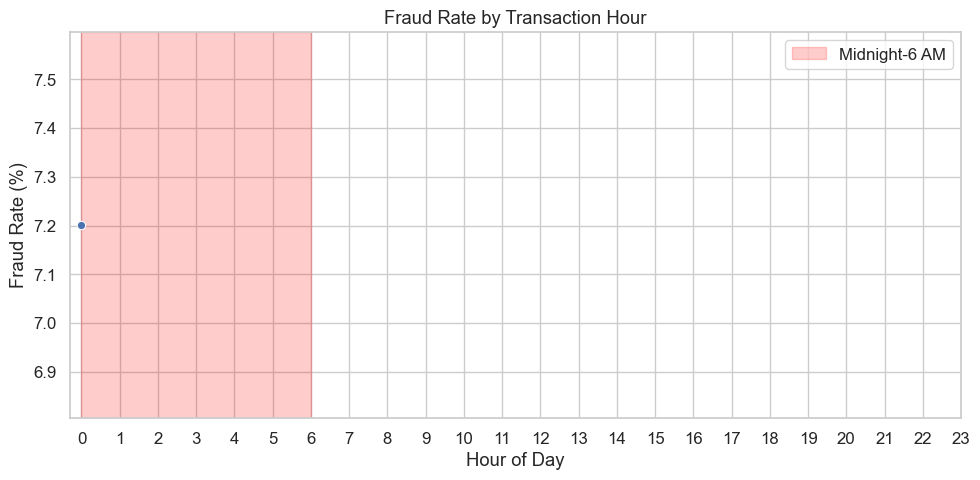


Visualization 1B: Fraud Rate by Day of Week
This bar chart shows the fraud rate for each day of the week.
It highlights whether weekends or specific weekdays have a higher incidence of fraud.


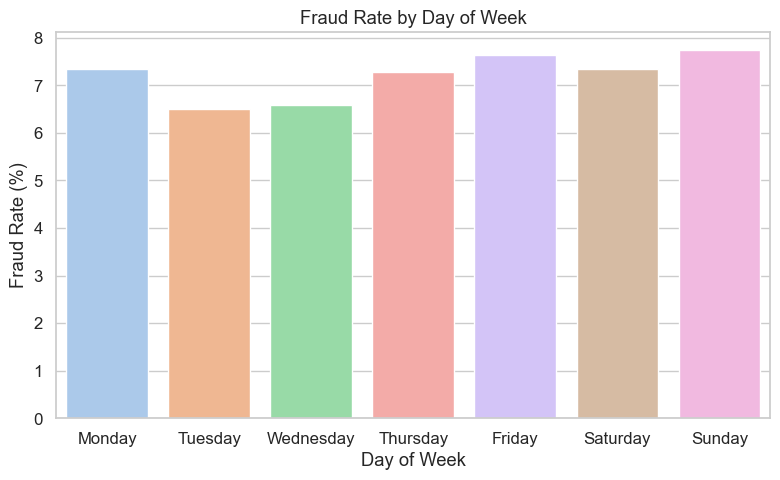


Visualization 2: Fraud Rate by Payment Channel
This bar chart compares the fraud rate between bank-level transactions and third-party methods.
A higher fraud rate on one channel indicates a vulnerability that may require additional controls.


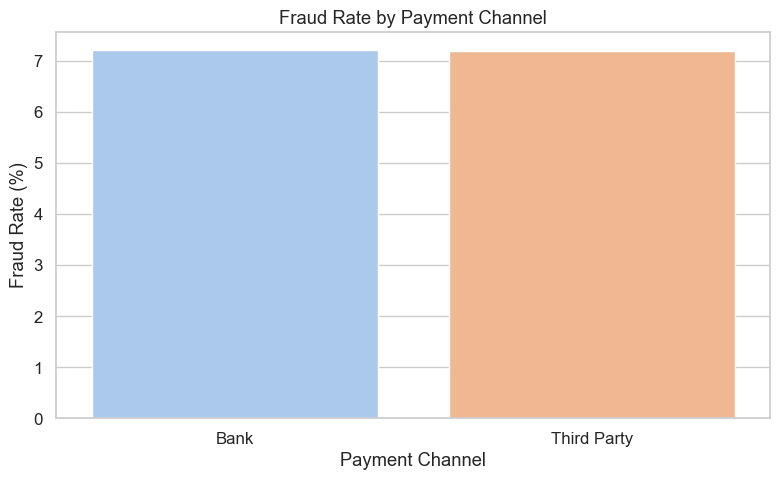


Visualization 3A: Fraud Rate by Customer Age Group
This visualization shows fraud rates across different customer age groups,
helping identify which age segments are more prone to fraud.


C:\Users\hp\AppData\Local\Temp\ipykernel_30012\3015124254.py:158: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = df.groupby('AgeGroup')['Is.Fraudulent'].agg(['sum','count']).reset_index()


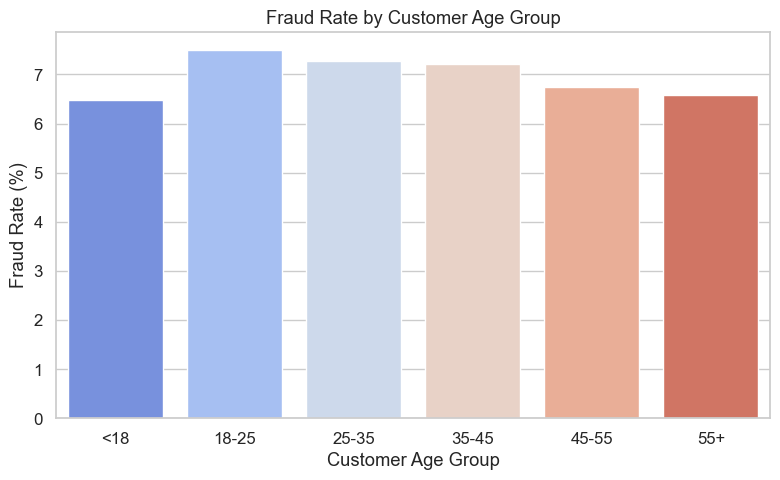


Visualization 3B: Fraud Rate by Account Age
This chart shows how fraud rates vary with account age.
New accounts (e.g., less than 30 days old) typically have a higher fraud rate.


C:\Users\hp\AppData\Local\Temp\ipykernel_30012\3015124254.py:177: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acct_age_stats = df.groupby('AccountAgeGroup')['Is.Fraudulent'].agg(['sum','count']).reset_index()


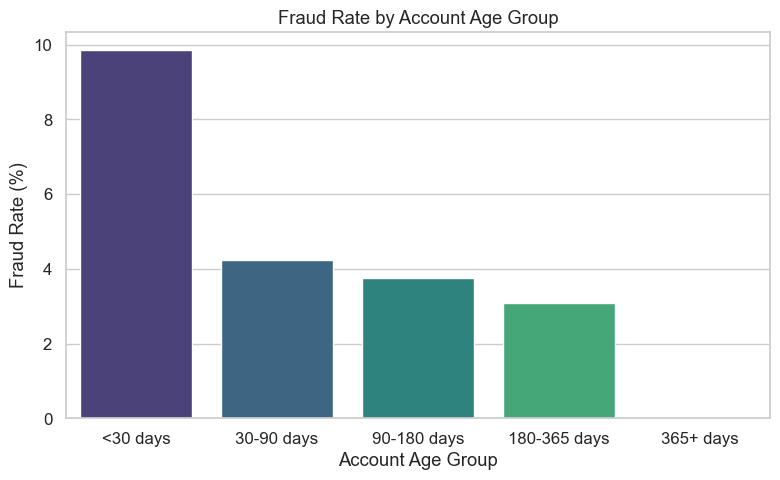


Visualization 4A: Transaction Amount vs. Account Age by Fraud Status
This scatter plot compares transaction amounts and account age, with fraud status indicated by color.
Clusters may reveal that new accounts with high transaction amounts are more prone to fraud.


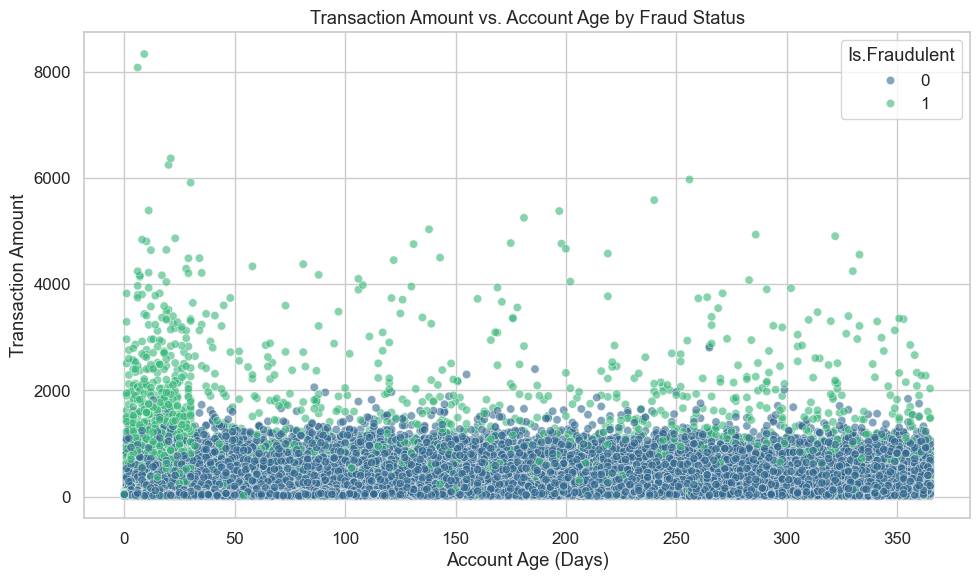


Visualization 4B: Boxplot of Transaction Amount by Fraud Status
This boxplot compares the distribution of transaction amounts between fraudulent and non-fraudulent transactions.
It can help reveal if fraud occurs predominantly at very low or very high transaction values.


C:\Users\hp\AppData\Local\Temp\ipykernel_30012\3015124254.py:215: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is.Fraudulent', y='Transaction.Amount', data=df, palette='Set2')


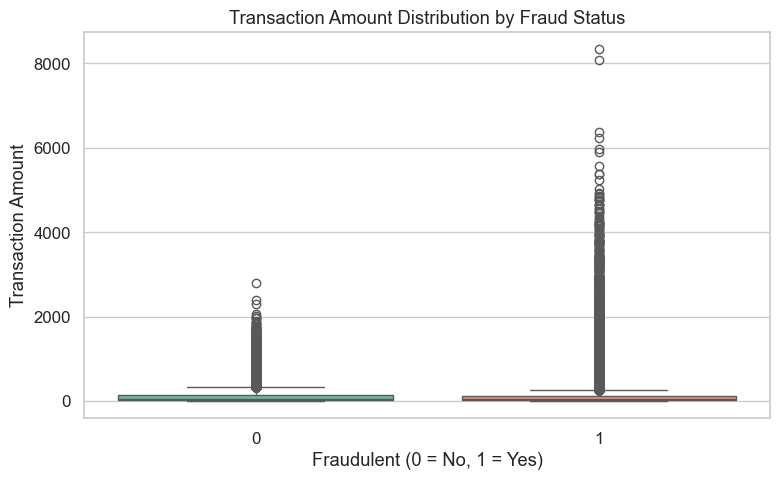


Visualization 4C: Violin Plot of Customer Age by Fraud Status
This violin plot shows the distribution of customer ages for fraudulent vs. non-fraudulent transactions.
It reveals potential demographic vulnerabilities.


C:\Users\hp\AppData\Local\Temp\ipykernel_30012\3015124254.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Is.Fraudulent', y='Customer.Age', data=df, palette='muted')


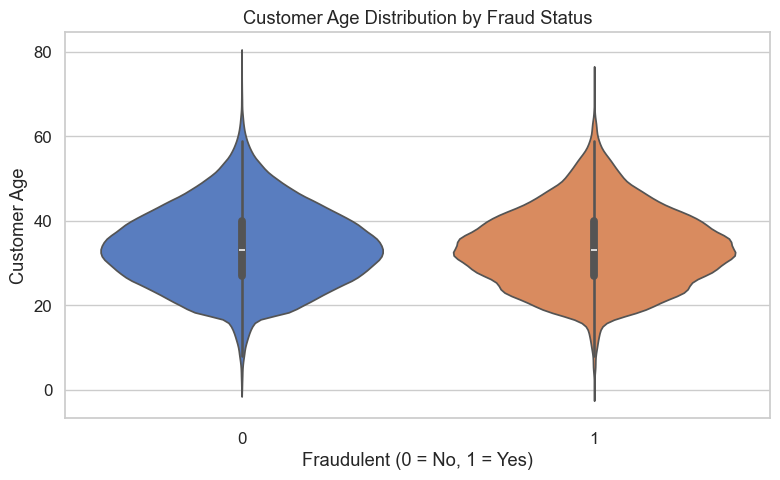


Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     44544
           1       0.26      0.31      0.28      3456

    accuracy                           0.89     48000
   macro avg       0.60      0.62      0.61     48000
weighted avg       0.90      0.89      0.89     48000

----------------------------------------

Model: KNN
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     44544
           1       0.35      0.46      0.40      3456

    accuracy                           0.90     48000
   macro avg       0.65      0.70      0.67     48000
weighted avg       0.91      0.90      0.91     48000

----------------------------------------

Model: DecisionTree
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     44544
           1       0.37      0.46      0.41      3456

    accuracy                           0

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:37:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     44544
           1       0.83      0.41      0.55      3456

    accuracy                           0.95     48000
   macro avg       0.89      0.70      0.76     48000
weighted avg       0.95      0.95      0.94     48000

----------------------------------------

Updated Model Evaluation Metrics:
                    Accuracy  Precision    Recall  F1 Score   ROC-AUC
LogisticRegression  0.887667   0.260988  0.305845  0.281641  0.745374
KNN                 0.898750   0.347391  0.462384  0.396723  0.729700
DecisionTree        0.905604   0.372841  0.456019  0.410256  0.698235
RandomForest        0.950958   0.794023  0.430556  0.558349  0.768850
GradientBoosting    0.952417   0.856882  0.407118  0.551981  0.794859
XGBoost             0.951646   0.828224  0.414352  0.552363  0.794550

Model saved as fraud_detection_model.pkl
Fitting 5 folds for each of 72 candidates, totall

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report, roc_curve)

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import pickle

# Set Plotly template and Seaborn style
pio.templates.default = "plotly_white"
sns.set(style="whitegrid", font_scale=1.1)

# %% [code]
# ---------------------------
# Data Loading & Feature Engineering
# ---------------------------
df = pd.read_csv("student_dataset.csv")
print("Dataset Preview:")
print(df.head())
print("\nDataset Info:")
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])

# Convert Transaction.Date to datetime and extract time features
df['Transaction.Date'] = pd.to_datetime(df['Transaction.Date'], errors='coerce')
df['Transaction.Year'] = df['Transaction.Date'].dt.year
df['Transaction.Month'] = df['Transaction.Date'].dt.month
df['Transaction.Day'] = df['Transaction.Date'].dt.day
df['DayOfWeek'] = df['Transaction.Date'].dt.dayofweek  # 0=Monday, 6=Sunday

# Ensure Transaction.Hour exists
if 'Transaction.Hour' not in df.columns:
    df['Transaction.Hour'] = df['Transaction.Date'].dt.hour

# (Optional) Reconstruct datetime if needed using extracted components
temp_date = df[['Transaction.Year', 'Transaction.Month', 'Transaction.Day']].rename(
    columns={'Transaction.Year': 'year', 'Transaction.Month': 'month', 'Transaction.Day': 'day'}
)
df['Transaction.Date.Reconstructed'] = pd.to_datetime(temp_date, errors='coerce')
df['Transaction.Date'] = df['Transaction.Date.Reconstructed']

# Create a Time_Bin column (Night: 0–6, Morning: 6–12, Afternoon: 12–18, Evening: 18–24)
bins = [-1, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['Time_Bin'] = pd.cut(df['Transaction.Hour'], bins=bins, labels=labels, include_lowest=True)

# Create Payment.Channel: classify 'Bank Transfer' or 'Bank' as Bank; all others as Third Party.
df['Payment.Channel'] = df['Payment.Method'].apply(
    lambda x: 'Bank' if x.strip().lower() in ['bank transfer', 'bank'] else 'Third Party'
)

# Create a categorical variable for Transaction.Amount using quantiles (Low, Medium, High)
df['Amount.Category'] = pd.qcut(df['Transaction.Amount'], q=3, labels=['Low', 'Medium', 'High'])

# Replace negative Customer.Age values with the mean of positive ages
positive_mean_age = int(df[df['Customer.Age'] >= 0]['Customer.Age'].mean())
df.loc[df['Customer.Age'] < 0, 'Customer.Age'] = positive_mean_age
print("Customer Age statistics after correction:")
print(df['Customer.Age'].describe())
print("Negative ages remaining:", df[df['Customer.Age'] < 0].shape[0])

# %% [code]
# ---------------------------
# NEW INSIGHTFUL VISUALIZATIONS
# ---------------------------

# Section 1: Timing of Fraud

# Visualization 1A: Fraud Rate by Transaction Hour
print("\nVisualization 1A: Fraud Rate by Transaction Hour")
print("This plot shows the fraud rate for each hour of the day. The red shaded region marks midnight–6 AM,")
print("a high-risk window where the relative fraud rate is notably higher.")

hourly_stats = df.groupby(df['Transaction.Date'].dt.hour)['Is.Fraudulent'].agg(['sum','count'])
hourly_stats['fraud_rate_pct'] = (hourly_stats['sum'] / hourly_stats['count']) * 100
hourly_stats = hourly_stats.reset_index().rename(columns={'Transaction.Date': 'Hour'})

# Print summary of peak and low risk hours
peak_hours = hourly_stats.sort_values('fraud_rate_pct', ascending=False).head(2)
low_hour = hourly_stats.sort_values('fraud_rate_pct', ascending=True).head(1)
print("Peak fraud hours:\n", peak_hours[['Hour','fraud_rate_pct']])
print("Lowest fraud hour:\n", low_hour[['Hour','fraud_rate_pct']])

plt.figure(figsize=(10,5))
sns.lineplot(x='Hour', y='fraud_rate_pct', data=hourly_stats, marker='o')
plt.axvspan(0, 6, color='red', alpha=0.2, label='Midnight-6 AM')
plt.title('Fraud Rate by Transaction Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate (%)')
plt.xticks(ticks=range(0, 24), labels=range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()

# Visualization 1B: Fraud Rate by Day of Week
print("\nVisualization 1B: Fraud Rate by Day of Week")
print("This bar chart shows the fraud rate for each day of the week.")
print("It highlights whether weekends or specific weekdays have a higher incidence of fraud.")
df['DayOfWeekName'] = df['Transaction.Date'].dt.day_name()
dow_stats = df.groupby('DayOfWeekName')['Is.Fraudulent'].agg(['sum','count']).reset_index()
dow_stats['fraud_rate_pct'] = dow_stats['sum'] / dow_stats['count'] * 100
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
dow_stats['DayOfWeekName'] = pd.Categorical(dow_stats['DayOfWeekName'], categories=order, ordered=True)
dow_stats = dow_stats.sort_values('DayOfWeekName')

plt.figure(figsize=(8,5))
sns.barplot(x='DayOfWeekName', y='fraud_rate_pct', data=dow_stats, hue='DayOfWeekName', palette='pastel')
plt.legend([],[], frameon=False)
plt.title('Fraud Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Fraud Rate (%)')
plt.tight_layout()
plt.show()

# Section 2: Payment Method Vulnerabilities

# Visualization 2: Fraud Rate by Payment Channel
print("\nVisualization 2: Fraud Rate by Payment Channel")
print("This bar chart compares the fraud rate between bank-level transactions and third-party methods.")
print("A higher fraud rate on one channel indicates a vulnerability that may require additional controls.")
channel_stats = df.groupby('Payment.Channel')['Is.Fraudulent'].agg(['sum', 'count']).reset_index()
channel_stats['Fraud_Rate (%)'] = (channel_stats['sum'] / channel_stats['count']) * 100

plt.figure(figsize=(8,5))
sns.barplot(x='Payment.Channel', y='Fraud_Rate (%)', data=channel_stats, hue='Payment.Channel', palette='pastel')
plt.legend([],[], frameon=False)
plt.title('Fraud Rate by Payment Channel')
plt.xlabel('Payment Channel')
plt.ylabel('Fraud Rate (%)')
plt.tight_layout()
plt.show()

# Section 3: Customer & Account Profiles

# Visualization 3A: Fraud Rate by Customer Age Group
print("\nVisualization 3A: Fraud Rate by Customer Age Group")
print("This visualization shows fraud rates across different customer age groups,")
print("helping identify which age segments are more prone to fraud.")
df['AgeGroup'] = pd.cut(df['Customer.Age'], bins=[0,18,25,35,45,55,100],
                        labels=["<18","18-25","25-35","35-45","45-55","55+"])
age_stats = df.groupby('AgeGroup')['Is.Fraudulent'].agg(['sum','count']).reset_index()
age_stats['fraud_rate_pct'] = (age_stats['sum'] / age_stats['count']) * 100

plt.figure(figsize=(8,5))
sns.barplot(x='AgeGroup', y='fraud_rate_pct', data=age_stats, hue='AgeGroup', palette='coolwarm')
plt.legend([],[], frameon=False)
plt.title('Fraud Rate by Customer Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Fraud Rate (%)')
plt.tight_layout()
plt.show()

# Visualization 3B: Fraud Rate by Account Age
print("\nVisualization 3B: Fraud Rate by Account Age")
print("This chart shows how fraud rates vary with account age.")
print("New accounts (e.g., less than 30 days old) typically have a higher fraud rate.")
df['AccountAgeGroup'] = pd.cut(df['Account.Age.Days'],
                               bins=[0,30,90,180,365, 10000],
                               labels=["<30 days","30-90 days","90-180 days","180-365 days","365+ days"])
acct_age_stats = df.groupby('AccountAgeGroup')['Is.Fraudulent'].agg(['sum','count']).reset_index()
acct_age_stats['fraud_rate_pct'] = (acct_age_stats['sum'] / acct_age_stats['count']) * 100

plt.figure(figsize=(8,5))
sns.barplot(x='AccountAgeGroup', y='fraud_rate_pct', data=acct_age_stats, hue='AccountAgeGroup', palette='viridis')
plt.legend([],[], frameon=False)
plt.title('Fraud Rate by Account Age Group')
plt.xlabel('Account Age Group')
plt.ylabel('Fraud Rate (%)')
plt.tight_layout()
plt.show()

# Section 4: Transaction Amount Patterns

# Visualization 4A: Scatter Plot – Transaction Amount vs. Account Age by Fraud Status
print("\nVisualization 4A: Transaction Amount vs. Account Age by Fraud Status")
print("This scatter plot compares transaction amounts and account age, with fraud status indicated by color.")
print("Clusters may reveal that new accounts with high transaction amounts are more prone to fraud.")
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Account.Age.Days',
    y='Transaction.Amount',
    hue='Is.Fraudulent',
    data=df,
    palette='viridis',
    alpha=0.6
)
plt.title('Transaction Amount vs. Account Age by Fraud Status')
plt.xlabel('Account Age (Days)')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()

# Visualization 4B: Boxplot of Transaction Amount by Fraud Status
print("\nVisualization 4B: Boxplot of Transaction Amount by Fraud Status")
print("This boxplot compares the distribution of transaction amounts between fraudulent and non-fraudulent transactions.")
print("It can help reveal if fraud occurs predominantly at very low or very high transaction values.")
plt.figure(figsize=(8,5))
sns.boxplot(x='Is.Fraudulent', y='Transaction.Amount', data=df, palette='Set2')
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('Fraudulent (0 = No, 1 = Yes)')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()

# Visualization 4C: Violin Plot of Customer Age by Fraud Status
print("\nVisualization 4C: Violin Plot of Customer Age by Fraud Status")
print("This violin plot shows the distribution of customer ages for fraudulent vs. non-fraudulent transactions.")
print("It reveals potential demographic vulnerabilities.")
plt.figure(figsize=(8,5))
sns.violinplot(x='Is.Fraudulent', y='Customer.Age', data=df, palette='muted')
plt.title('Customer Age Distribution by Fraud Status')
plt.xlabel('Fraudulent (0 = No, 1 = Yes)')
plt.ylabel('Customer Age')
plt.tight_layout()
plt.show()

# ---------------------------
# Preprocessing for Model Training & Evaluation
# ---------------------------
# To ensure all features are numeric, we now drop columns that contain non-numeric values.
# We also encode the Payment.Channel column.
df['Payment.Channel'], _ = pd.factorize(df['Payment.Channel'])

# Build the feature set for training: choose only numeric columns.
# We use: Transaction.Amount, Customer.Age, Transaction.Hour, DayOfWeek, Account.Age.Days, and Payment.Channel.
X = df[['Transaction.Amount', 'Customer.Age', 'Transaction.Hour', 'DayOfWeek', 'Account.Age.Days', 'Payment.Channel']].copy()
y = df['Is.Fraudulent']

# Split the dataset (80% training, 20% evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Impute missing values on the training set and apply the same transformation to the evaluation set
imputer_train = SimpleImputer(strategy="mean")
X_train_imputed = imputer_train.fit_transform(X_train)
X_test_imputed = imputer_train.transform(X_test)

# Apply SMOTE oversampling only on the training data
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_imputed, y_train)

# Standardize features
scaler_std = StandardScaler()
X_train_scaled = scaler_std.fit_transform(X_train_res)
X_test_scaled = scaler_std.transform(X_test_imputed)

# ---------------------------
# Model Training & Evaluation
# ---------------------------
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train_res)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1, 'ROC-AUC': roc_auc}

    # ---------------------------
    # Explanation of the Classification Report:
    #
    # For example, the output for LogisticRegression might look like this:
    #
    #              precision    recall  f1-score   support
    #
    #        0       0.95      0.93      0.94     44544
    #        1       0.26      0.31      0.28      3456
    #
    # - 'Precision' for a class is the proportion of predicted instances for that class that are correct.
    # - 'Recall' is the proportion of actual instances of that class that were correctly identified.
    # - 'F1-score' is the harmonic mean of precision and recall.
    # - 'Support' is the total number of actual instances in that class.
    # - 'Accuracy' is the overall fraction of correct predictions.
    # - 'Macro avg' computes the unweighted average for each metric across classes.
    # - 'Weighted avg' computes the average for each metric weighted by the number of instances in each class.
    #
    # Similar interpretation applies to the outputs for KNN, DecisionTree, etc.
    # ---------------------------

    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 40)

results_df = pd.DataFrame(results).T
print("\nUpdated Model Evaluation Metrics:")
print(results_df)

# Save the best model (RandomForest, as an example)
best_model = models['RandomForest']
model_filename = 'fraud_detection_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)
print(f"\nModel saved as {model_filename}")

# ---------------------------
# Hyperparameter Tuning with GridSearchCV
# ---------------------------
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='recall', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train_res)
print("\nBest parameters from GridSearchCV:", grid_search.best_params_)

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)
y_prob_best = best_rf.predict_proba(X_test_scaled)[:, 1]
print("\nClassification Report for Best RandomForest Model:")
print(classification_report(y_test, y_pred_best))
roc_auc_best = roc_auc_score(y_test, y_prob_best)
print("ROC-AUC Score for Best Model:", roc_auc_best)

# Optional: Adjust decision threshold to improve recall
threshold = 0.4
y_pred_adjusted = (y_prob_best >= threshold).astype(int)
print(f"\nClassification Report with threshold {threshold}:")
print(classification_report(y_test, y_pred_adjusted))

# Visualization: ROC Curve for Best Model
print("\nVisualization: ROC Curve for Best RandomForest Model")
print("This ROC Curve demonstrates the trade-off between the true positive rate and false positive rate,")
print("providing an overall measure of the model's performance (AUC).")
plt.figure(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best RandomForest Model')
plt.legend()
plt.tight_layout()
plt.show()

# ---------------------------
# Evaluation Preprocessing for New Data (Without Oversampling)
# ---------------------------
print("\nEvaluation Preprocessing for New Data:")
print("This section demonstrates how to preprocess new evaluation data without applying oversampling.")
df_eval_raw = pd.read_csv("/mnt/data/student_dataset.csv")
df_eval_raw['Transaction.Date'] = pd.to_datetime(df_eval_raw['Transaction.Date'], errors='coerce')
df_eval_raw['Transaction.Hour'] = df_eval_raw['Transaction.Date'].dt.hour
df_eval_raw['DayOfWeek'] = df_eval_raw['Transaction.Date'].dt.dayofweek
df_eval_raw['Payment.Channel'] = df_eval_raw['Payment.Method'].apply(
    lambda x: 'Bank' if x.strip().lower() in ['bank transfer', 'bank'] else 'Third Party'
)
# Factorize Payment.Channel on evaluation data as well
df_eval_raw['Payment.Channel'], _ = pd.factorize(df_eval_raw['Payment.Channel'])
df_eval_raw['Amount.Category'] = pd.qcut(df_eval_raw['Transaction.Amount'], q=3, labels=['Low', 'Medium', 'High'])
# Factorize categorical columns on evaluation data (here, just Amount.Category)
categorical_cols = ['Amount.Category']
for col in categorical_cols:
    df_eval_raw[col], _ = pd.factorize(df_eval_raw[col])
print("Evaluation data preprocessing complete. Ready for model evaluation on new data.")